In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

- Dataset used : https://drive.google.com/file/d/1TIAgMkjbyDzi3siVCVixIXPVyeyAsWyZ/view?usp=sharing

In [2]:
browsing_data=pd.read_csv('Desktop/Problem2_Site_BrowingBehavior.csv', delimiter='\t',header=None) 
browsing_data.columns=['Timestamp', 'UserID','Website_section_visited']
browsing_data.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [3]:
browsing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 126.7+ MB


In [4]:
conversion_data=pd.read_csv('Desktop/Problem2_FInalConversions.csv',sep="\t", header = None)
conversion_data.columns=['Timestamp', 'UserID', 'Products_Sold', 'Bill_Value']
conversion_data.head()

,Timestamp,UserID,Products_Sold,Bill_Value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [5]:
conversion_data['Timestamp']= pd.to_datetime(conversion_data['Timestamp'])
conversion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      79795 non-null  datetime64[ns]
 1   UserID         79795 non-null  int64         
 2   Products_Sold  79795 non-null  object        
 3   Bill_Value     79795 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [6]:
#Merging two Dataframes
merge_data=pd.merge(conversion_data, browsing_data, how='inner', left_index=True, right_index=True)
merge_data.shape

(79795, 7)

In [7]:
merge_data.head()

,Timestamp_x,UserID_x,Products_Sold,Bill_Value,Timestamp_y,UserID_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,0,content


In [8]:
merge_data = merge_data.drop(['UserID_y'], axis=1)
merge_data.head()

,Timestamp_x,UserID_x,Products_Sold,Bill_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content


#### We can calculate timediff and based on it we can try to say like time spend Vs Product purchased 
#### But seen that in Problem statement hint we can calculate product purchased = no of timestamp for each user 
#### so just commenting below section of code ..


In [9]:
# Checked NULL values if any 
merge_data.isnull().any()

Timestamp_x                False
UserID_x                   False
Products_Sold              False
Bill_Value                 False
Timestamp_y                False
Website_section_visited    False
dtype: bool

In [10]:
merge_data['Website_section_visited'].unique()     # gives Unique sections 

array(['product', 'default', 'product-listing-category', 'content',
       'home', 'cart', 'product-listing-search', 'iroa', 'shoplive',
       'productNotFound', 'product-listing-custom', 'signupcomplete'],
      dtype=object)

In [11]:
merge_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID_x,79795.0,3.440433e+18,3.052801e+18,0.0,0.0,3.017190e+18,6.118151e+18,9.223308e+18
Bill_Value,79795.0,6.978623e+01,1.163489e+02,1.0,32.5,4.764000e+01,7.534000e+01,7.324800e+03


In [126]:
df_final.head()

,Timestamp_x,UserID,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content


In [12]:
#adding registered user and non-registered user 
merge_data['Non_Registered_UserID'] = merge_data['UserID_x'].apply(lambda x: x<=0 )

merge_data.head()

,Timestamp_x,UserID_x,Products_Sold,Bill_Value,Timestamp_y,Website_section_visited,Non_Registered_UserID
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product,True
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product,True
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default,True
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category,True
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content,True


### Calculating Peak Time - Number of User as per the specified Time Range.

In [13]:
merge_data_time = merge_data.copy()

In [14]:
merge_data_time['Time_Day'] = merge_data_time['Timestamp_x'].apply(lambda x:str(x)[11:16])

In [16]:
merge_time_Analysis= merge_data_time.groupby('Time_Day')['Timestamp_x'].count().reset_index().rename(columns={'Timestamp_x': 'User_Count'})

merge_time_Analysis= merge_time_Analysis.sort_values('Time_Day')
merge_time_Analysis.head()

,Time_Day,User_Count
0,00:00,88
1,00:01,115
2,00:02,77
3,00:03,90
4,00:04,89


<AxesSubplot:xlabel='Time_Day'>

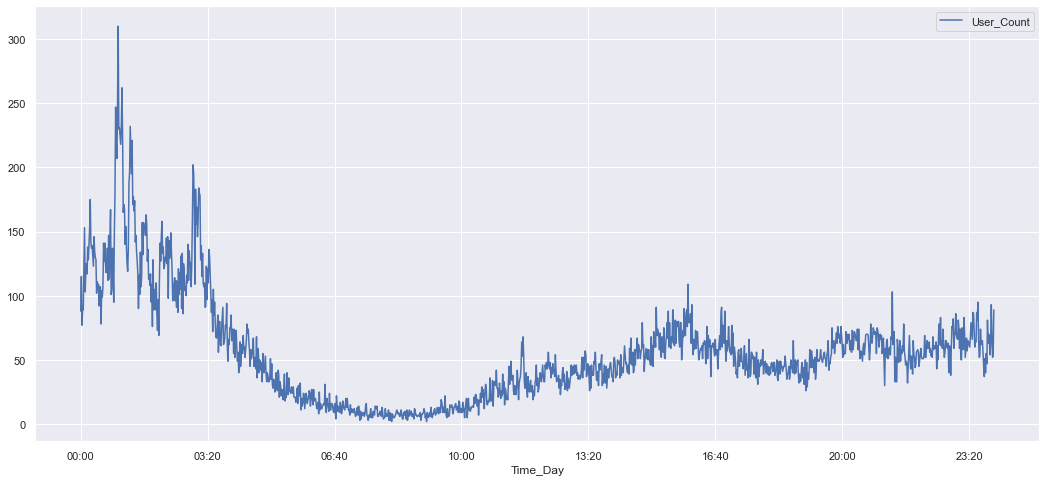

In [17]:
merge_time_Analysis.plot(x='Time_Day',y='User_Count',figsize=(18,8))

##### As per the graph depicted  above the Peak Time is between 1AM to 2AM.

#### Registered User Vs Non-Registered User Analysis 

In [18]:
User_Analysis= merge_data.groupby('Non_Registered_UserID')['Timestamp_x'].count().reset_index().rename(columns={'Timestamp_x': 'User_Count'})

User_Analysis['Percentile']= User_Analysis['User_Count'].apply(lambda x:x/len(merge_data)*100)

User_Analysis.head()

,Non_Registered_UserID,User_Count,Percentile
0,False,59598,74.68889
1,True,20197,25.31111


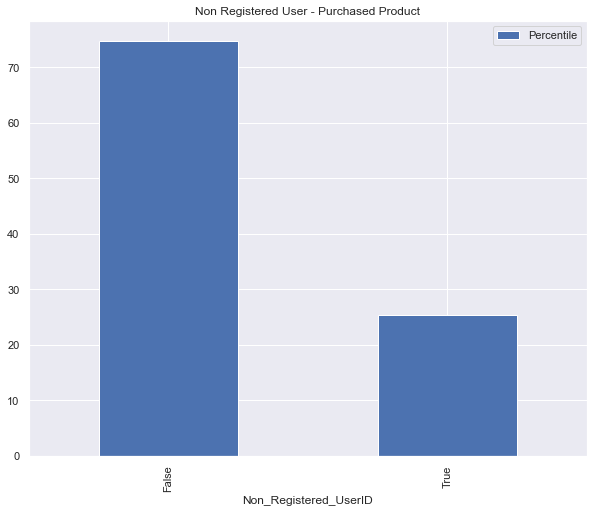

In [19]:
User_Analysis.plot.bar(x="Non_Registered_UserID", y="Percentile", rot=90, title='Non Registered User - Purchased Product',figsize=(10,8));


### Analysis in Percentile -  Products_Sold  Vs User Count  - Non-Registered User

In [20]:
Product_Analysis= merge_data[merge_data['Non_Registered_UserID']==True].groupby('Products_Sold')['Timestamp_x'].count().reset_index().rename(columns={'Timestamp_x': 'User_Count'})
Product_Analysis.head()

,Products_Sold,User_Count
0,A00468,1
1,A00475,1
2,A04426,1
3,"A04916,A04916",1
4,A04949,2


In [22]:
Product_Analysis['percentile']= Product_Analysis['User_Count'].apply(lambda x:x/len(merge_data)*100)
Product_Analysis = Product_Analysis.sort_values('User_Count',ascending=False)
Product_Analysis.head(10)

,Products_Sold,User_Count,percentile
1651,A293532,1640,2.055267
2856,H211394,1439,1.803371
3740,K45766,1438,1.802118
2849,H211370,1226,1.536437
2860,H211397,423,0.530108
1916,A299297,399,0.500031
1996,A302728,355,0.444890
3092,H211939,348,0.436118
2457,H205246,313,0.392255
3173,H212471,248,0.310796


### Analysis in Percentile - Products Sold Vs User Count - Registered User

In [23]:
Product_Analysis_R= merge_data[merge_data['Non_Registered_UserID']==False].groupby('Products_Sold')['Timestamp_x'].count().reset_index().rename(columns={'Timestamp_x': 'User_Count'})
Product_Analysis_R.head()

,Products_Sold,User_Count
0,A00185,1
1,A00468,2
2,A00475,2
3,A01725,1
4,"A01725,A01725,A287093",1


In [24]:
Product_Analysis_R['Percentile']= Product_Analysis_R['User_Count'].apply(lambda x:x/len(merge_data)*100)

Product_Analysis_R = Product_Analysis_R.sort_values('User_Count', ascending=False)

Product_Analysis_R.head(10)

,Products_Sold,User_Count,Percentile
9654,K45766,4756,5.960273
7409,H211394,3729,4.673225
7397,H211370,3694,4.629363
4252,A293532,3158,3.957641
7413,H211397,1011,1.266997
5053,A302728,986,1.235666
4864,A299297,935,1.171753
6339,H205246,880,1.102826
7884,H211939,786,0.985024
9284,K41372,710,0.889780


### Analysis - Overall Products sold to/ Purchased by any user  (Highest to lowest)

In [25]:
# overall highest sold product
Product_Analysis_Sales= merge_data.groupby('Products_Sold')['Timestamp_x'].count().reset_index().rename(columns={'Timestamp_x': 'User_Count'})
Product_Analysis_Sales.head()

,Products_Sold,User_Count
0,A00185,1
1,A00468,3
2,A00475,3
3,A01725,1
4,"A01725,A01725,A287093",1


In [26]:
Product_Analysis_Sales['Percentile']= Product_Analysis_Sales['User_Count'].apply(lambda x:x/len(merge_data)*100)

Product_Analysis_Sales = Product_Analysis_Sales.sort_values("User_Count", ascending=False)

Product_Analysis_Sales.head(10)

,Products_Sold,User_Count,Percentile
11482,K45766,6194,7.762391
8766,H211394,5168,6.476596
8752,H211370,4920,6.165800
5072,A293532,4798,6.012908
8770,H211397,1434,1.797105
6004,A302728,1341,1.680556
5788,A299297,1334,1.671784
7509,H205246,1193,1.495081
9349,H211939,1134,1.421142
11055,K41372,924,1.157967


#### Preparing data for target variable 
#### Used Hint 3rd Point : and calculating total product purchase , Number of Time Visited, Based on TimeStamp value



In [27]:
merge_data.head()

,Timestamp_x,UserID_x,Products_Sold,Bill_Value,Timestamp_y,Website_section_visited,Non_Registered_UserID
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product,True
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product,True
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default,True
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category,True
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content,True


In [28]:
merge_data.shape

(79795, 7)

In [30]:
Final_data= merge_data.groupby(['UserID_x','Products_Sold']).agg([('Timestamp_x', 'count'), ('Bill_Value','sum')]).reset_index().rename(columns={'Timestamp_x': 'User_Count'})
Final_data.head()

UserID_x  Products_Sold Bill_Value            Timestamp_y  \
                          User_Count Bill_Value  User_Count   
0        0         A00468          1      29.00           1   
1        0         A00475          1      34.00           1   
2        0         A04426          1      38.00           1   
3        0  A04916,A04916          1      65.94           1   
4        0         A04949          2      36.00           2   

                                                  Website_section_visited  \
                                       Bill_Value              User_Count   
0                         2017-07-26 00:17:39.935                       1   
1                         2017-07-26 00:07:56.994                       1   
2                         2017-07-26 00:28:59.785                       1   
3                          2017-07-26 00:16:00.04                       1   
4  2017-07-26 00:03:44.4052017-07-26 00:07:16.283                       2   

                  Non_Registered_UserID             
       Bill_Value            User_Count Bill_Value  
0            home                     1          1  
1         product                     1          1  
2         content                     1          1  
3            home                     1          1  
4  productproduct                     2          2

In [36]:
Final_data.to_csv('Website_Data')

In [37]:
web_data = pd.read_csv('Website_Data')
web_data.head()

,Unnamed: 0,UserID_x,Products_Sold,Bill_Value,Bill_Value.1,Timestamp_y,Timestamp_y.1,Website_section_visited,Website_section_visited.1,Non_Registered_UserID,Non_Registered_UserID.1
0,NaN,NaN,NaN,User_Count,Bill_Value,User_Count,Bill_Value,User_Count,Bill_Value,User_Count,Bill_Value
1,0.0,0.0,A00468,1,29.0,1,2017-07-26 00:17:39.935,1,home,1,1
2,1.0,0.0,A00475,1,34.0,1,2017-07-26 00:07:56.994,1,product,1,1
3,2.0,0.0,A04426,1,38.0,1,2017-07-26 00:28:59.785,1,content,1,1
4,3.0,0.0,"A04916,A04916",1,65.94,1,2017-07-26 00:16:00.04,1,home,1,1


In [38]:
web_data_1 = web_data.drop(['Unnamed: 0','Bill_Value','Timestamp_y','Timestamp_y.1','Website_section_visited.1','Non_Registered_UserID','Non_Registered_UserID.1'],axis=1)
web_data_1

,UserID_x,Products_Sold,Bill_Value.1,Website_section_visited
0,NaN,NaN,Bill_Value,User_Count
1,0.000000e+00,A00468,29.0,1
2,0.000000e+00,A00475,34.0,1
3,0.000000e+00,A04426,38.0,1
4,0.000000e+00,"A04916,A04916",65.94,1
...,...,...,...,...
57294,9.222345e+18,K45766,89.96,1
57295,9.222828e+18,J335116,292.0,1
57296,9.222850e+18,H211455,64.4,1
57297,9.223094e+18,"K45766,A359090",144.96,1


In [39]:
web_data_1 = web_data_1[1:]
web_data_1.UserID_x = web_data_1.UserID_x.astype('int64')
web_data_final = web_data_1.sort_values("Website_section_visited",ascending=False)
web_data_final

C:\Users\Raja\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,UserID_x,Products_Sold,Bill_Value.1,Website_section_visited
521,0,A272888,431.82000000000005,9
764,0,A277830,223.02,9
4089,0,T34477,212.7,9
1460,0,A290543,1175.64,9
3437,0,J346534,202.56,9
...,...,...,...,...
20826,2846342302026876416,A292234,119.08,1
20827,2846346377298007552,H210206,23.48,1
20828,2846387091884377088,"H211858,H211858,H211858",120.9,1
20829,2846577649571108352,K45766,89.96,1


#### calculating product count , Probability of purchase & Target Variable as per the Hint provided in Problem Statement 
#### Uncomment the section as per requirement 

In [43]:
# Adding product count by converting product_Purchased in a list and applying length function on it 

#web_data_final['Products_Sold'] = web_data_final.Products_Sold.map(lambda x: [i.strip() for i in x.split(",")])
web_data_final['Total_Product_Sold'] = web_data_final.Products_Sold.apply(len)
web_data_final.head()

,UserID_x,Products_Sold,Bill_Value.1,Website_section_visited,Total_Product_Sold
521,0,[A272888],431.82000000000005,9,1
764,0,[A277830],223.02,9,1
4089,0,[T34477],212.7,9,1
1460,0,[A290543],1175.64,9,1
3437,0,[J346534],202.56,9,1


In [47]:
web_data_final.info

<bound method DataFrame.info of                   UserID_x                Products_Sold        Bill_Value.1  \
521                      0                    [A272888]  431.82000000000005   
764                      0                    [A277830]              223.02   
4089                     0                     [T34477]               212.7   
1460                     0                    [A290543]             1175.64   
3437                     0                    [J346534]              202.56   
...                    ...                          ...                 ...   
20826  2846342302026876416                    [A292234]              119.08   
20827  2846346377298007552                    [H210206]               23.48   
20828  2846387091884377088  [H211858, H211858, H211858]               120.9   
20829  2846577649571108352                     [K45766]               89.96   
57298  9223308018930725888                    [A358150]                54.0   

      Website_secti

In [49]:
web_data_final.Total_Product_Sold = web_data_final.Total_Product_Sold.astype('int64')
web_data_final.Website_section_visited = web_data_final.Website_section_visited.astype('int64')

In [50]:
web_data_final.info

<bound method DataFrame.info of                   UserID_x                Products_Sold        Bill_Value.1  \
521                      0                    [A272888]  431.82000000000005   
764                      0                    [A277830]              223.02   
4089                     0                     [T34477]               212.7   
1460                     0                    [A290543]             1175.64   
3437                     0                    [J346534]              202.56   
...                    ...                          ...                 ...   
20826  2846342302026876416                    [A292234]              119.08   
20827  2846346377298007552                    [H210206]               23.48   
20828  2846387091884377088  [H211858, H211858, H211858]               120.9   
20829  2846577649571108352                     [K45766]               89.96   
57298  9223308018930725888                    [A358150]                54.0   

       Website_sect

In [52]:
web_data_final['Probability_Product_Sold'] = web_data_final['Total_Product_Sold'] / web_data_final['Website_section_visited']

In [53]:
web_data_final.head()

,UserID_x,Products_Sold,Bill_Value.1,Website_section_visited,Total_Product_Sold,Probability_Product_Sold
521,0,[A272888],431.82000000000005,9,1,0.111111
764,0,[A277830],223.02,9,1,0.111111
4089,0,[T34477],212.7,9,1,0.111111
1460,0,[A290543],1175.64,9,1,0.111111
3437,0,[J346534],202.56,9,1,0.111111


In [54]:
web_data_final['Bill_Value.1'] = web_data_final['Bill_Value.1'].astype(float)

web_data_final['Target'] = web_data_final['Probability_Product_Sold'] * web_data_final['Bill_Value.1']

web_data_final

,UserID_x,Products_Sold,Bill_Value.1,Website_section_visited,Total_Product_Sold,Probability_Product_Sold,Target
521,0,[A272888],431.82,9,1,0.111111,47.980000
764,0,[A277830],223.02,9,1,0.111111,24.780000
4089,0,[T34477],212.70,9,1,0.111111,23.633333
1460,0,[A290543],1175.64,9,1,0.111111,130.626667
3437,0,[J346534],202.56,9,1,0.111111,22.506667
...,...,...,...,...,...,...,...
20826,2846342302026876416,[A292234],119.08,1,1,1.000000,119.080000
20827,2846346377298007552,[H210206],23.48,1,1,1.000000,23.480000
20828,2846387091884377088,"[H211858, H211858, H211858]",120.90,1,3,3.000000,362.700000
20829,2846577649571108352,[K45766],89.96,1,1,1.000000,89.960000


In [55]:
web_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57298 entries, 521 to 57298
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UserID_x                  57298 non-null  int64  
 1   Products_Sold             57298 non-null  object 
 2   Bill_Value.1              57298 non-null  float64
 3   Website_section_visited   57298 non-null  int64  
 4   Total_Product_Sold        57298 non-null  int64  
 5   Probability_Product_Sold  57298 non-null  float64
 6   Target                    57298 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.5+ MB


#### Dropping Product purchased as already we have taken count of it
#### Removing unwanted columns like UserID, Probability of product purchased and preparing final dataframe for modellling 

In [56]:
web_data_final_1 = web_data_final.drop(['Products_Sold','Probability_Product_Sold','UserID_x'],axis=1)
web_data_final_1.head()

,Bill_Value.1,Website_section_visited,Total_Product_Sold,Target
521,431.82,9,1,47.980000
764,223.02,9,1,24.780000
4089,212.70,9,1,23.633333
1460,1175.64,9,1,130.626667
3437,202.56,9,1,22.506667


In [57]:
web_data_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57298 entries, 521 to 57298
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bill_Value.1             57298 non-null  float64
 1   Website_section_visited  57298 non-null  int64  
 2   Total_Product_Sold       57298 non-null  int64  
 3   Target                   57298 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 2.2 MB


In [59]:
web_data_final_1.Target = web_data_final_1.Target.astype('int64')
web_data_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57298 entries, 521 to 57298
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bill_Value.1             57298 non-null  float64
 1   Website_section_visited  57298 non-null  int64  
 2   Total_Product_Sold       57298 non-null  int64  
 3   Target                   57298 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.2 MB


In [60]:
web_data_final_1.shape

(57298, 4)

In [61]:
X = web_data_final_1.drop(['Target'], axis=1)
y = web_data_final_1['Target']
X.head()

,Bill_Value.1,Website_section_visited,Total_Product_Sold
521,431.82,9,1
764,223.02,9,1
4089,212.70,9,1
1460,1175.64,9,1
3437,202.56,9,1


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45838, 3) (11460, 3) (45838,) (11460,)


### Using Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rand_fc = RandomForestClassifier(n_estimators=200, random_state=40)
rand_fc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=40)

In [66]:
n_nodes = []
max_depths = []

for ind_tree in rand_fc.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [67]:
print(f'Model Accuracy Random Forest Classifier: {rand_fc.score(X_train, y_train)}')

Model Accuracy Random Forest Classifier: 1.0


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
rand_fc_pred = rand_fc.predict(X_test)
print(classification_report(y_test, rand_fc_pred))

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       0.90      1.00      0.95        19
          10       1.00      0.90      0.95        21
          11       1.00      0.86      0.92         7
          12       0.94      0.94      0.94        18
          13       1.00      0.96      0.98        26
          14       0.91      1.00      0.95        10
          15       1.00      1.00      1.00        14
          16       1.00      0.97      0.98        30
          17       0.99      0.97      0.98        79
          18       1.00      1.00      1.00        37
          19       0.98      0.98      0.98        62
          20       0.99      0.99      0.99       167
          21       1.00      1.00      1.00       198
          22       0.98      0.99      0.99       195
          23       1.00    

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classif

- Random Forest Classifier accuracy is 95%

### Using Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtree = DecisionTreeClassifier(random_state = 40)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [75]:
print(f'Model Accuracy : {dtree.score(X_train, y_train)}')

Model Accuracy : 1.0


In [76]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       0.90      1.00      0.95        19
          10       1.00      0.90      0.95        21
          11       1.00      0.86      0.92         7
          12       1.00      0.94      0.97        18
          13       1.00      0.96      0.98        26
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        14
          16       1.00      0.97      0.98        30
          17       1.00      0.96      0.98        79
          18       1.00      0.97      0.99        37
          19       0.98      0.98      0.98        62
          20       0.99      0.99      0.99       167
          21       1.00      1.00      1.00       198
          22       0.99      0.99      0.99       195
          23       1.00    

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classif

- Decision Tree Classifier accuracy is 95%

### Using Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 

In [78]:
lr.fit(X_train,y_train)

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
pred = lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        19
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00        26
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00        30
          17       0.00      0.00      0.00        79
          18       0.00      0.00      0.00        37
          19       0.00      0.00      0.00        62
          20       0.00      0.00      0.00       167
          21       0.00      0.00      0.00       198
          22       0.00      0.00      0.00       195
          23       0.00    

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Logistic Regression accuracy is 8%

### Creating Pickle file named 'web_rand_fc.pkl' using Random Forest Classifier Model:

In [80]:
import pickle as pkl

In [81]:
pkl.dump(rand_fc, open ('web_rand_fc.pkl', 'wb'))